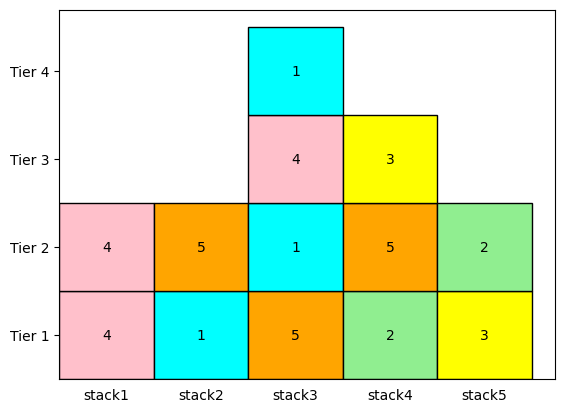

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Define the bay
bay = {
    "stack1": [4, 4],
    "stack2": [1, 5],
    "stack3": [5, 1, 4, 1],
    "stack4": [2, 5, 3],
    "stack5": [3, 2]
}

fig, ax = plt.subplots()

colors = ['cyan', 'lightgreen', 'yellow', 'pink', 'orange']  # add more colors if needed

for i, (stack_name, stack) in enumerate(bay.items()):
    bottom = 0
    for j, container in enumerate(stack):
        ax.bar(i, 1, bottom=bottom, color=colors[container - 1], edgecolor='black', width=1)
        ax.text(i, bottom + 0.5, str(container), color='black', ha='center', va='center')
        bottom += 1

ax.set_xticks(np.arange(len(bay)))
ax.set_xticklabels(bay.keys())

# Setting y ticks as 'Tier 1', 'Tier 2', etc.
ax.set_yticks(np.arange(max(len(stack) for stack in bay.values())) + 0.5)
ax.set_yticklabels([f'Tier {i+1}' for i in range(max(len(stack) for stack in bay.values()))])

# Removing x-axis ticks for a cleaner look
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)  # labels along the bottom edge are off

ax.set_xlim(left=-0.5)  # adjust the x-axis limit to remove the gap
plt.show()


In [59]:

# Define the bay
bay = {
    "stack1": [4, 4],
    "stack2": [1, 5],
    "stack3": [5, 1, 4, 1],
    "stack4": [2, 5, 3],
    "stack5": [3, 2]
}

# Define functions for computing the minimum of the largest time frames 
# and the maximum of the smallest time frames across all stacks
def min_h_s(bay):
    return min(max(stack) for stack in bay.values())

def max_l_s(bay):
    return max(min(stack) for stack in bay.values())

# Initialize output
output = 0

# Calculate q(c) for each container in the bay
for stack_name, stack in bay.items():
    for i, container in enumerate(stack):
        if i == 0: # no container underneath
            u_c = float('inf') # assign it to infinity
        else:
            u_c = min(stack[:i]) # Smallest time frame of containers underneath c

        t_c = container  # t(c) is the time window of the container
        if u_c > t_c:
            q_c = 1
        elif u_c == t_c:
            q_c = 2
        elif u_c > min_h_s(bay) or t_c < max_l_s(bay):
            q_c = 3
        else:
            q_c = 4
        print(f"In {stack_name}, container with time window {t_c} has q(c) = {q_c}")

        # Add to output
        if q_c == 4:
            output += 1.4
        elif q_c == 3:
            output += 1
        elif q_c == 2:
            output += 0.5

print(f"Output: {output}")


In stack1, container with time window 4 has q(c) = 1
In stack1, container with time window 4 has q(c) = 2
In stack2, container with time window 1 has q(c) = 1
In stack2, container with time window 5 has q(c) = 4
In stack3, container with time window 5 has q(c) = 1
In stack3, container with time window 1 has q(c) = 1
In stack3, container with time window 4 has q(c) = 4
In stack3, container with time window 1 has q(c) = 2
In stack4, container with time window 2 has q(c) = 1
In stack4, container with time window 5 has q(c) = 4
In stack4, container with time window 3 has q(c) = 3
In stack5, container with time window 3 has q(c) = 1
In stack5, container with time window 2 has q(c) = 1
Output: 6.199999999999999


In [63]:
# Initialize output and q_values dictionary
output = 0
q_values = {stack_name: [] for stack_name in bay.keys()}

# Calculate q(c) for each container in the bay
for stack_name, stack in bay.items():
    for i, container in enumerate(stack):
        if i == 0:  # no container underneath
            u_c = float('inf')  # assign it to infinity
        else:
            u_c = min(stack[:i])  # Smallest time frame of containers underneath c

        t_c = container  # t(c) is the time window of the container
        if u_c > t_c:
            q_c = 1
        elif u_c == t_c:
            q_c = 2
        elif u_c > min_h_s(bay) or t_c < max_l_s(bay):
            q_c = 3
        else:
            q_c = 4
        print(f"In {stack_name}, container with time window {t_c} has q(c) = {q_c}")

        # Add to q_values
        q_values[stack_name].append(q_c)

        # Add to output
        if q_c == 4:
            output += 1.4
        elif q_c == 3:
            output += 1
        elif q_c == 2:
            output += 0.5

print(f"Output: {output}")
print(f"q(c) values: {q_values}")


In stack1, container with time window 4 has q(c) = 1
In stack1, container with time window 4 has q(c) = 2
In stack2, container with time window 1 has q(c) = 1
In stack2, container with time window 5 has q(c) = 4
In stack3, container with time window 5 has q(c) = 1
In stack3, container with time window 1 has q(c) = 1
In stack3, container with time window 4 has q(c) = 4
In stack3, container with time window 1 has q(c) = 2
In stack4, container with time window 2 has q(c) = 1
In stack4, container with time window 5 has q(c) = 4
In stack4, container with time window 3 has q(c) = 3
In stack5, container with time window 3 has q(c) = 1
In stack5, container with time window 2 has q(c) = 1
Output: 6.199999999999999
q(c) values: {'stack1': [1, 2], 'stack2': [1, 4], 'stack3': [1, 1, 4, 2], 'stack4': [1, 4, 3], 'stack5': [1, 1]}


In [64]:
q_values

{'stack1': [1, 2],
 'stack2': [1, 4],
 'stack3': [1, 1, 4, 2],
 'stack4': [1, 4, 3],
 'stack5': [1, 1]}

In [32]:
import random

bay = {
    "stack1": [4, 4],
    "stack2": [1, 5],
    "stack3": [5, 1, 4, 1],
    "stack4": [2, 5, 3],
    "stack5": [3, 2]
}

# Helper function to get stack name given a container
def get_stack(bay, container):
    for stack_name, stack in bay.items():
        if container in stack:
            return stack_name
    return None

# Helper function to find the minimum time window in a stack
def min_time_window(stack):
    return min(stack)

# Helper function to check if a stack is a valid destination
def is_valid_destination(bay, stack_name, container):
    stack = bay[stack_name]
    return len(stack) < 5 and (len(stack) == 0 or min_time_window(stack) > container)

# Parameters
container = 4  # We're moving the container with time window 4
src_stack_name = get_stack(bay, container)  # The stack where the container is currently located
dst_stack_name = "stack2"  # The stack where we want to move the container to
alpha = 0.1
lambda_1 = lambda_2 = 3

# Containers that need to be moved before we can move the container
O_c = [c for c in bay[src_stack_name] if bay[src_stack_name].index(c) > bay[src_stack_name].index(container)]

# Containers that need to be moved in the destination stack before we can place the container
M_c = [c for c in bay[dst_stack_name] if bay[dst_stack_name].index(c) < bay[dst_stack_name].count(container)]

# Containers that need to be moved
containers_to_move = O_c + M_c

# Pre-processing moves
P = []

# Keep moving containers until we can move the container
while containers_to_move:
    # Choose a container to move
    c_prime = containers_to_move[0]

    # Find a new stack for the container
    valid_stacks = [stack_name for stack_name, stack in bay.items() if is_valid_destination(bay, stack_name, c_prime) and stack_name != src_stack_name and stack_name != dst_stack_name]

    # If there are multiple valid stacks, choose one randomly
    if valid_stacks:
        new_stack_name = random.choice(valid_stacks)

        # Move the container to the new stack
        bay[src_stack_name].remove(c_prime)
        bay[new_stack_name].append(c_prime)

        # Add the move to the list of pre-processing moves
        P.append((src_stack_name, new_stack_name))

        # Remove the container from the list of containers to move
        containers_to_move.remove(c_prime)

# Move the container to the destination stack
bay[src_stack_name].remove(container)
bay[dst_stack_name].append(container)
P.append((src_stack_name, dst_stack_name))

print("Pre-processing moves:", P)
print("Final bay configuration:", bay)


Pre-processing moves: [('stack1', 'stack2')]
Final bay configuration: {'stack1': [4], 'stack2': [1, 5, 4], 'stack3': [5, 1, 4, 1], 'stack4': [2, 5, 3], 'stack5': [3, 2]}


In [65]:
def calculate_expected_moves(bay, q_values, stack):
    stack_containers = bay[stack]
    q_c_values = q_values[stack]
    n = len(stack_containers)
    f = sum(1.4 if q_c == 4 else 1 if q_c == 3 else 0.5 if q_c == 2 else 0 for q_c in q_c_values)
    return f



In [42]:
def preprocess_moves_algo3(bay, container_c, stack_s, α, λ1, λ2):
    # Define a function for calculating f(B, s)
    def f_B_s(bay, stack):
        # Use Algorithm 5 to estimate f(B, s)
        return calculate_expected_moves(bay, stack)

    # Initialize pre-processing moves
    P = []

    # Identify the current stack of the container c (s_c) and its position (p_c)
    s_c, p_c = get_container_position(bay, container_c)
    t_c = container_c

    # Containers in s(c) with position > p(c)
    O_c = {container: index for stack_name, stack in bay.items() for index, container in enumerate(stack) if stack_name == s_c and index > p_c}

    while O_c:
        # Let o be the top container of the sets O_c
        o = max(O_c, key=O_c.get, default=None)

        # Select a container c' and define t_c_prime
        c_prime = o
        t_c_prime = c_prime
        O_c.pop(c_prime, None)

        # Containers in stack s with u(c') < t(c)
        M_c = {container: index for index, container in enumerate(bay[stack_s]) if index < t_c_prime}

        # If there exists a stack s' in S \ ({s(c), s}) for which n(s') < H and l(s') > t(c') and f(B, s') <= α
        available_stacks = {k: v for k, v in bay.items() if len(v) < H and k != s and k != s_c and min(v) > t_c_prime and f_B_s(bay, k) <= α}
        if available_stacks:
            # Sort the stacks by the smallest minimum time frame
            sorted_stacks = sorted(available_stacks, key=lambda k: min(available_stacks[k]))
            # Select λ1 stacks with the smallest minimum time frame
            selected_stacks = sorted_stacks[:λ1]
        else:
            # If no valid stacks, select one with the smallest minimum time frame
            available_stacks = {k: v for k, v in bay.items() if len(v) < H and k != s and k != s_c and min(v) > t_c_prime}
            # Sort the stacks by the smallest minimum time frame
            sorted_stacks = sorted(available_stacks, key=lambda k: min(available_stacks[k]))
            # Select λ2 stacks with the smallest minimum time frame
            selected_stacks = sorted_stacks[:λ2]

        # Select a stack randomly
        s_double_prime = random.choice(selected_stacks)

        # Relocate container c' to stack s''
        bay[s_double_prime].append(c_prime)
        bay[s_c].remove(c_prime)

        # Add the move to P
        P.append((s_c, s_double_prime))

    # Finally, move c to s
    bay[s].append(c)
    bay[s_c].remove(c)

    # Add the move to P
    P.append((s_c, s))

    return P, bay


In [43]:
# Bay example
bay = {
    "stack1": [4, 4],
    "stack2": [1, 5],
    "stack3": [5, 1, 4, 1],
    "stack4": [2, 5, 3],
    "stack5": [3, 2]
}

# Variables
container_c = 4
stack_s = "stack4"
α = 0.1
λ1 = 3
λ2 = 3

# Test the algorithm
P, bay = preprocess_moves_algo3(bay, container_c, stack_s, α, λ1, λ2)
print(P)
print(bay)


NameError: name 'get_container_position' is not defined

In [29]:
# Bay example
bay = {
    "stack1": [4, 4],
    "stack2": [1, 5],
    "stack3": [5, 1, 4, 1],
    "stack4": [2, 5, 3],
    "stack5": [3, 2]
}

In [30]:
container_c = 4
stack_s = "stack4"

In [31]:
 

# Containers in s(c) with position > p(c)
O_c = {container: index for stack_name, stack in bay.items() for index, container in enumerate(stack) if stack_name == s_c and index > p_c}

# Containers in stack s with u(c') < t(c)
M_c = {container: index for index, container in enumerate(stack_s) if index < t_c}

NameError: name 's_c' is not defined

In [51]:
# Bay example
bay = {
    "stack1": [4, 4],
    "stack2": [1, 5],
    "stack3": [5, 1, 4, 1],
    "stack4": [2, 5, 3],
    "stack5": [3, 2]
}

In [53]:
def get_all_containers_with_time(bay, time_frame):
    container_positions = {}
    for stack_name, stack in bay.items():
        for index, container in enumerate(stack):
            if container == time_frame:
                container_positions[(stack_name, index)] = container
    return container_positions


In [54]:
get_all_containers_with_time(bay, 5)

{('stack2', 1): 5, ('stack3', 0): 5, ('stack4', 1): 5}

In [66]:
calculate_expected_moves(bay,q_values,'stack1')

0.5

In [52]:
get_container_position(bay,5)

('stack2', 1)

In [44]:
def get_container_position(bay, container):
    for stack_name, stack in bay.items():
        if container in stack:
            return stack_name, stack.index(container)
    return None, None

In [50]:
import random

def calculate_expected_moves(bay,q_values, stack):
    # This is a placeholder for Algorithm 5
    return 0

def get_container_position(bay, container):
    for stack_name, stack in bay.items():
        if container in stack:
            return stack_name, stack.index(container)
    return None, None

def preprocess_moves_algo3(bay, q_values,container_c, stack_s, α, λ1, λ2, H):
    # Define a function for calculating f(B, s)
    def f_B_s(bay, stack):
        # Use Algorithm 5 to estimate f(B, s)
        return calculate_expected_moves(bay,q_values, stack)

    # Initialize pre-processing moves
    P = []

    # Identify the current stack of the container c (s_c) and its position (p_c)
    s_c, p_c = get_container_position(bay, container_c)
    t_c = container_c

    # Containers in s(c) with position > p(c)
    O_c = {container: index for stack_name, stack in bay.items() for index, container in enumerate(stack) if stack_name == s_c and index > p_c}

    while O_c:
        # Let o be the top container of the sets O_c
        o = max(O_c, key=O_c.get, default=None)

        # Select a container c' and define t_c_prime
        c_prime = o
        t_c_prime = c_prime
        O_c.pop(c_prime, None)

        # If there exists a stack s' in S \ ({s(c), stack_s}) for which n(s') < H and l(s') > t(c') and f(B, s') <= α
        available_stacks = {k: v for k, v in bay.items() if len(v) < H and k != stack_s and k != s_c and min(v) > t_c_prime and f_B_s(bay, k) <= α}
        if available_stacks:
            # Sort the stacks by the smallest minimum time frame
            sorted_stacks = sorted(available_stacks, key=lambda k: min(available_stacks[k]))
            # Select λ1 stacks with the smallest minimum time frame
            selected_stacks = sorted_stacks[:λ1]
        else:
            # If no valid stacks, select one with the smallest minimum time frame
            available_stacks = {k: v for k, v in bay.items() if len(v) < H and k != stack_s and k != s_c and min(v) > t_c_prime}
            # Sort the stacks by the smallest minimum time frame
            sorted_stacks = sorted(available_stacks, key=lambda k: min(available_stacks[k]))
            # Select λ2 stacks with the smallest minimum time frame
            selected_stacks = sorted_stacks[:λ2]

        # If no stack is selected, continue to next iteration
        if not selected_stacks:
            continue

        # Select a stack randomly
        s_double_prime = random.choice(selected_stacks)

        # Relocate container c' to stack s''
        bay[s_double_prime].append(c_prime)
        bay[s_c].remove(c_prime)

        # Add the move to P
        P.append((s_c, s_double_prime))

    # Finally, move c to stack_s
    bay[stack_s].append(container_c)
    bay[s_c].remove(container_c)

    # Add the move to P
    P.append((s_c, stack_s))

    return P, bay

# Bay example
bay = {
    "stack1": [4, 4],
    "stack2": [1, 5],
    "stack3": [5, 1, 4, 1],
    "stack4": [2, 5, 3],
    "stack5": [3, 2]
}

# Variables
container_c = 4
stack_s = "stack4"
α = 0.1
λ1 = 3
λ2 = 3
H = 5  # replace this value as per your problem's constraints

# Test the algorithm
P, bay = preprocess_moves_algo3(bay, container_c, stack_s, α, λ1, λ2, H)
print(P)
print(bay)


[('stack1', 'stack4')]
{'stack1': [4], 'stack2': [1, 5], 'stack3': [5, 1, 4, 1], 'stack4': [2, 5, 3, 4], 'stack5': [3, 2]}


In [ ]:
import numpy as np

def local_search_heuristic(bay, alpha, lambda1, lambda2):
    # Create a copy of the bay to perform operations
    bay_copy = bay.copy()

    # Initialize preprocessing moves
    P = []

    # Calculate the maximum time frame in the bay
    Z = max(max(stack) for stack in bay_copy.values())

    # Start from the largest time frame
    for p in range(Z, 0, -1):
        # Find the containers with the current time frame
        A_p = {c for c, t in bay_copy.items() if t == p}

        # Iterate over all containers in A_p
